The purpose of this nb is to predict whether a review from IMDB (Internet Movie Database) is positive (1) or negative (0), determining the sentiment or attitude of the writer, through binary classification using a Keras deep learning model and the IMDB dataset.

In [1]:
import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra, arrays
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb  # imdb dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # text processing

Set top frequent words limit in 2000

In [2]:
top_freq_words = 2000

Loading imdb dataset

In [3]:
(train_features, train_labels), (test_features, test_labels) = imdb.load_data(
    num_words=top_freq_words
)

17464789/17464789 [==============================] - 0s 0us/step


**Data evaluation**

In [7]:
print(f"Train features: {len(train_features)}")
print(f"Test features: {len(test_features)}")

Train features: 25000
Test features: 25000


In [8]:
print(f"Number of unique words: {max([max(words) for words in train_features]) + 1}")
print(f"Number of categories: {max(train_labels) + 1}")

Number of unique words: 2000
Number of categories: 2


In [9]:
print(f"Train features sample: {train_features[0]}")
print(f"Train labels sample: {train_labels[0]}")

Train features sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Train labels sample: 1


In [57]:
print(f"Train features sample: {test_features[0]}")
print(f"Train labels sample: {test_labels[0]}")

Train features sample: [1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 1668, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]
Train labels sample: 0


To decode the integer encoded train sample is required the word index

In [10]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


Decoding of integer encoded train sample with unknown words showed as '?'

In [52]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_train_sample = " ".join([reverse_word_index.get(i - 3, "?") for i in train_features[0]])
print(f"Decoded train sample: {decoded_train_sample}")

Decoded train sample: ? this film was just brilliant casting location scenery story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? island as myself so i loved the fact there was a real ? with this film the witty ? throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so lovely because it was tru

In [56]:
reverse_word_index1 = dict([(value, key) for (key, value) in word_index.items()])
decoded_test_sample = " ".join([reverse_word_index1.get(i - 3, "?") for i in test_features[0]])
print(f"Decoded test sample: {decoded_test_sample}")

Decoded test sample: ? please give this one a miss br br ? ? and the rest of the cast ? terrible performances the show is flat flat flat br br i don't know how michael ? could have allowed this one on his ? he almost seemed to know this wasn't going to work out and his performance was quite ? so all you ? fans give this a miss


**Data preparation**

Use of Tokenizer for preparing integer encoded text documents for deep learning. Tokenizer must be created and then fit on text documents before encoding train and test documents

In [31]:
tokenizer = Tokenizer(num_words=top_freq_words)
tokenizer.fit_on_sequences(train_features)
train_features_b = tokenizer.sequences_to_matrix(train_features, mode="binary")
test_features_b = tokenizer.sequences_to_matrix(test_features, mode="binary")

In [32]:
train_labels_b = np.asarray(train_labels).astype("float32")
test_labels_b = np.asarray(test_labels).astype("float32")

In [33]:
print(train_features_b.shape)
print(train_features_b[1])

(25000, 2000)
[0. 1. 1. ... 0. 0. 0.]


In [34]:
print(train_labels_b.shape)
print(train_labels_b[1])

(25000,)
0.0


Build a sequential model with a method that can be reused

In [35]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(24, activation="relu", input_shape=(top_freq_words,)))
    model.add(layers.Dense(24, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [36]:
model = build_model()

Split train features to create validation dataset (25%)

In [37]:
from sklearn.model_selection import train_test_split

(partial_train_feat, val_feat, partial_train_lab, val_lab) = train_test_split(
    train_features_b, train_labels_b, test_size=0.25, random_state=4
)

Training the model for 10 epochs or passes over the entire dataset

In [38]:
history = model.fit(
    partial_train_feat,
    partial_train_lab,
    epochs=10,
    batch_size=512,
    validation_data=(val_feat, val_lab),
)

Epoch 1/10
37/37 [==============================] - 1s 13ms/step - loss: 0.5115 - accuracy: 0.7730 - val_loss: 0.3874 - val_accuracy: 0.8480
Epoch 2/10
37/37 [==============================] - 0s 7ms/step - loss: 0.3438 - accuracy: 0.8631 - val_loss: 0.3187 - val_accuracy: 0.8704
Epoch 3/10
37/37 [==============================] - 0s 7ms/step - loss: 0.2948 - accuracy: 0.8819 - val_loss: 0.3039 - val_accuracy: 0.8755
Epoch 4/10
37/37 [==============================] - 0s 7ms/step - loss: 0.2729 - accuracy: 0.8916 - val_loss: 0.3074 - val_accuracy: 0.8765
Epoch 5/10
37/37 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.8971 - val_loss: 0.3493 - val_accuracy: 0.8550
Epoch 6/10
37/37 [==============================] - 0s 6ms/step - loss: 0.2490 - accuracy: 0.9002 - val_loss: 0.3280 - val_accuracy: 0.8699
Epoch 7/10
37/37 [==============================] - 0s 8ms/step - loss: 0.2438 - accuracy: 0.9023 - val_loss: 0.3076 - val_accuracy: 0.8730
Epoch 8/10
37/37 [=

Plotting training and validation loss

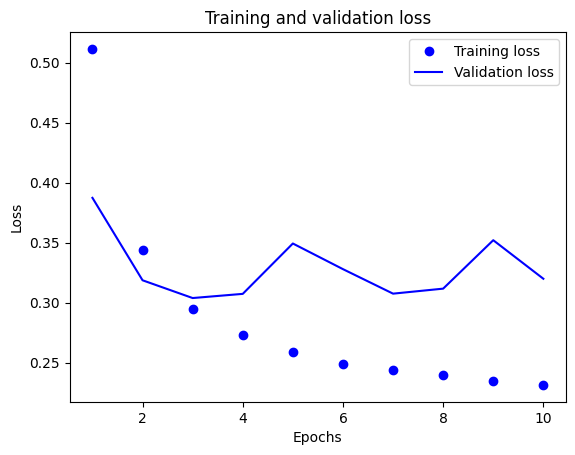

In [39]:
loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Plotting training and validation accuracy

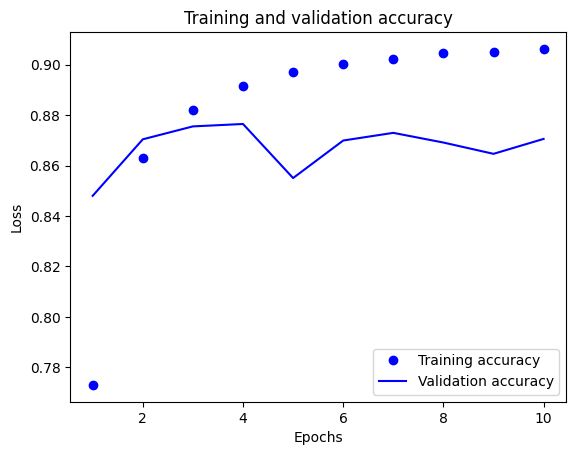

In [40]:
acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, validation_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Overfit starts after 4 epochs

Rebuild and retrain the model from scratch for 4 epochs to avoid overfit. Note that validation set is not used for this time

In [41]:
model = build_model()

In [42]:
model.fit(train_features_b, train_labels_b, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.4838 - accuracy: 0.7844
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.8729
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.8852
Epoch 4/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.8941


Model evaluation

In [43]:
final_loss, final_acc = model.evaluate(test_features_b, test_labels_b)

782/782 [==============================] - 1s 1ms/step - loss: 0.3175 - accuracy: 0.8681


Final results

In [45]:
print(f"Final loss: {final_loss}")
print(f"Final accuracy: {final_acc}")

Final loss: 0.31752532720565796
Final accuracy: 0.868120014667511
